In [28]:
import numpy as np

#Problem 1



In (n x k) and (k x m) matrix multiplication, 

for each entry there need to be,

        k multiplications

&

        (k-1) additions

So, total operations for matrix multiplication comes out to be,

        n*m*k multiplications & n*m*(k-1) additions

#Problem 2

In [29]:
# Using list of lists
import timeit
import statistics as st
import random

n,k,m = 3, 4, 3

def matMul():
    X = [ [random.randint(-1000, 1000) for j in range(k)] for i in range(n)]
    Y = [ [random.randint(-1000, 1000) for j in range(m)] for i in range(k)]

    result = [ [0 for x in range(m)] for y in range(n)]

    for i in range(len(X)):
        for j in range(len(Y[0])):
            for l in range(len(Y)):
                result[i][j] += X[i][l] * Y[l][j]

result = %timeit -o -r 10 -n 1000 matMul()
print("The average time taken:", result.average)
print("Standard deviation:", result.stdev)

45 µs ± 3.07 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)
The average time taken: 4.498943690005035e-05
Standard deviation: 3.07137137974165e-06


In [30]:
#Using Numpy
n,k,m = 3, 4, 3

def matMul():
  X = np.random.randint(-1000, 1000, size=(n, k))
  Y = np.random.randint(-1000, 1000, size=(k, m))

  M = np.dot(X, Y)

result = %timeit -o -r 10 -n 1000 matMul()
print("The average time taken:", result.average)
print("Standard deviation:", result.stdev)

23.1 µs ± 1.61 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)
The average time taken: 2.3065945000053033e-05
Standard deviation: 1.6088580886223456e-06


As we can see,

The average time for 10 runs, 1000 loops each we get

* For lists of lists
  * Average or mean time = 42.9 µs
  * Standard Deviation = 892 ms 

* For numpy
  * Average or mean time = 23.4 µs
  * Standard Deviation = 1.54 µs

&nbsp;


There is significant difference between computed time for matrix multiplication using the two methods because numpy iterates on arrays and performs arithmetic operations much faster than python interpretor. This is due to the fact that numpy in the core uses C array which are highly optimized for iterations and operations.

#Problem 3

In [31]:
ArrayRangemin = 0
ArrayRangemax = 20
A = np.random.randint(ArrayRangemin, ArrayRangemax, size = 9)

def Highest_elem(A):
  highest = 0

  for j in range(len(A)):
    if A[j] > A[highest]:
        highest = j

  return highest

print(A)
highest = Highest_elem(A)
print("The highest element is", A[highest])

[ 8 19 14  9 19 12  5 13 15]
The highest element is 19


In [32]:
def Second_highest_elem(A):
  highest = 0

  highInd = Highest_elem(A)
  A[highInd] = ArrayRangemin-1
    
  return Highest_elem(A)

print(A)
highest = Second_highest_elem(A.copy())
print("The second highest element is", A[highest])

[ 8 19 14  9 19 12  5 13 15]
The second highest element is 19


In [33]:
# Median by calculating next highest element
def median(A):
  highInd = 0
  highestVal = A[highInd]

  for i in range(len(A)//2):
    highInd = Highest_elem(A)
    x = A[highInd]
    A[highInd] = ArrayRangemin-1

  if len(A)%2 == 0:
    highInd = Highest_elem(A)
    y = A[highInd]
    return (x+y)/2
  else:
    return A[Highest_elem(A)]

print("The median is: ", median(A.copy()))
result = %timeit -o -r 10 -n 1000 median(A.copy())
print("The average time taken:", result.average)
print("Standard deviation:", result.stdev)

The median is:  13
16 µs ± 1.24 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)
The average time taken: 1.601353840005686e-05
Standard deviation: 1.242931288800935e-06


In [34]:
#Calculating median by sorting
def median_sort(A):
  A.sort()
  if len(A)%2 == 0:
    return (( A[len(A)//2] + A[len(A)//2 + 1] )/2)
  else:
    return (A[len(A)//2])

print("Median by sorting:", median_sort(A.copy()))
result = %timeit -o -r 10 -n 1000 median_sort(A.copy())
print("The average time taken:", result.average)
print("Standard deviation:", result.stdev)

Median by sorting: 13
The slowest run took 12.23 times longer than the fastest. This could mean that an intermediate result is being cached.
2.17 µs ± 3.3 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)
The average time taken: 2.1725738999521125e-06
Standard deviation: 3.298989848084001e-06


In [35]:
print(np.median(A))
result = %timeit -o -r 10 -n 1000 np.median(A.copy())
print("The average time taken:", result.average)
print("Standard deviation:", result.stdev)
A.sort()
print(A)

13.0
22.5 µs ± 1.72 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)
The average time taken: 2.2546246000001704e-05
Standard deviation: 1.7239061645939791e-06
[ 5  8  9 12 13 14 15 19 19]


As we can see,


To find the median of array we have three methods. Comparing these methods by their execution time, we have


The average time for 10 runs, 1000 loops each:

* By finding highest in the array
  * Average or mean time = 20 µs
  * Standard Deviation = 2.19 µs 

* By numpy median
  * Average or mean time = 23.6 µs
  * Standard Deviation = 6.63 µs

* By sorting the array
  * Average or mean time = 1.95 µs
  * Standard Deviation = 408ns
&nbsp;


Here we can see that finding median using method in the problem statement and using `numpy.median` are almost same and not that fast.

But, first sorting the array and then finding the median greatly improves the speed and computes its the fastest.

Analysis:

Time complexity
* From highest in the array: $ O({n^2}) $
* From highest in the array: $ O(n*logn) $

#Problem 4&5&6

Given function $ f = x^2y + y^3\sin{(x)} $ w.r.t $x$ and $y$.
<br>

$ \frac{df}{dx} = 2xy + y^3\cos{(x)} $
<br>

$ \frac{df}{dy} = x^2 + 3y^2\sin{(x)} $
<br>

Gradient of f is ( $ 2xy + y^3\cos{(x)} $, &nbsp;  $ x^2 + 3y^2\sin{(x)} $ )

In [36]:
import jax
import jax.numpy as jnp
from jax import random
import sympy
key = random.PRNGKey(752913)

def f(x, y):
  return jnp.sum(x * x * y + jnp.sin(x) * y ** 3)

def grad_f(x,y):
  return ((2 * x * y + jnp.cos(x) * y ** 3), (x * x + jnp.sin(x) * 3 * y ** 2))


X = jnp.asarray(random.uniform(key, shape=(5,)))
Y = jnp.asarray(random.uniform(key, shape=(5,)))

print("Gradient calculated by hand: ((2 * x * y + cos(x) * y ** 3), (x * x + sin(x) * 3 * y ** 2))")
print("Gradient evaluated by hand")
print( grad_f(X,Y)[0], end="  ")
print( grad_f(X,Y)[1] )

Gradient calculated by hand: ((2 * x * y + cos(x) * y ** 3), (x * x + sin(x) * 3 * y ** 2))
Gradient evaluated by hand
[0.5021931 1.5730457 2.2704515 1.2703688 0.1341156]  [0.4839975  1.9205058  3.0473099  1.4767023  0.10352471]


In [37]:
df_dxy = jax.grad(f, argnums=(0, 1))

print("Gradient evaluated by jax")
print( df_dxy(X,Y)[0] )
print( df_dxy(X,Y)[1] )

decPoints = 3
print("is i cap Gradient equal:", (df_dxy(X, Y)[0].round(decPoints) == grad_f(X,Y)[0].round(decPoints)).all())
print("is j cap Gradient equal:", (df_dxy(X, Y)[1].round(decPoints) == grad_f(X,Y)[1].round(decPoints)).all())

Gradient evaluated by jax
[0.5021931 1.5730457 2.2704515 1.2703688 0.1341156]
[0.4839975  1.920506   3.0473099  1.4767025  0.10352471]
is i cap Gradient equal: True
is j cap Gradient equal: True


In [38]:
x, y = sympy.symbols('x y')
f = x*x*y + sympy.sin(x)*y**3

sympy_grad = [sympy.diff(f, x), sympy.diff(f, y)]

print("Gradient calculated by sympy: ", sympy_grad)
print("x                  y")
for i in range(len(X)):
  print(sympy_grad[0].subs([(x, X[i]), (y, Y[i])]), sympy_grad[1].subs([(x, X[i]), (y, Y[i])]))

Gradient calculated by sympy:  [2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]
x                  y
0.502193076587999 0.483997480552324
1.57304566447440 1.92050579762359
2.27045165391161 3.04730981193846
1.27036870929392 1.47670225359170
0.134115600834960 0.103524712056701


Here we can see, gradients from all three methods are computed to be equal.

#Problem 7

In [39]:
StudentsDB ={
    "2022": {
        "Branch1":{
            "R1": {
                "name": "Adam",
                "marks": {
                    "math": 20,
                    "phys": 10,
                    "chem": 18
                }
            },
            "R2": {
                "name": "Dave",
                "marks": {
                    "math": 20,
                    "phys": 20,
                    "chem": 20
                }
            },
            
        },
        "Branch2":{
            "R1": {
                "name": "Bill",
                "marks": {
                    "math": 20,
                    "phys": 20,
                    "chem": 20
                }
            }
        }
    },
    "2023": {
        "Branch1":{
            "R1": {
                "name": "Cath",
                "marks": {
                    "math": 20,
                    "phys": 20,
                    "chem": 20
                }
            }
        }
    }
}

print(StudentsDB)

{'2022': {'Branch1': {'R1': {'name': 'Adam', 'marks': {'math': 20, 'phys': 10, 'chem': 18}}, 'R2': {'name': 'Dave', 'marks': {'math': 20, 'phys': 20, 'chem': 20}}}, 'Branch2': {'R1': {'name': 'Bill', 'marks': {'math': 20, 'phys': 20, 'chem': 20}}}}, '2023': {'Branch1': {'R1': {'name': 'Cath', 'marks': {'math': 20, 'phys': 20, 'chem': 20}}}}}


#Problem 8

In [40]:
import json

class StudentsDB:
  def __init__(self):
     self._db = {}
  
  def add(self, yr, branch):
    if yr not in self._db.keys():
      self._db.__setitem__(yr, {})
    
    self._db[yr].__setitem__(f"Branch{len(self._db[yr])+1}", branch._db)

class Branch:
  def __init__(self):
    self._db = {}

  def add(self, stud):    
    self._db.__setitem__(f"R{len(self._db)+1}", {
        "name": stud.name,
        "marks": stud.marks
    })

class Student:
  def __init__(self, name, marks):
    self.name = name
    self.marks = {
        "math": marks.math,
        "phys": marks.phys,
        "chem": marks.chem
    }

class SubMarks:
  def __init__(self, x, y, z):
    self.math = x
    self.phys = y
    self.chem = z

# For making classes I have approached the problem in two ways:
#   * Making dict in class: For such classes we have to make variable for different keys, 
#     but we do not have enter keys in calling.
#   * By variables in class: No need of separate variables, keys can be added while declaration.
#
branch1 = Branch()
branch2 = Branch()
branch3 = Branch()

branch1.add( Student("Adam",      SubMarks(20, 20, 20) ) )
branch1.add( Student("Dave",      SubMarks(17, 18, 14) ) )
branch2.add( Student("Bill",      SubMarks(10, 2, 9)   ) )
branch3.add( Student("Elon",      SubMarks(20, 20, 19) ) )
branch1.add( Student("Catherine", SubMarks(20, 20, 20) ) )

db = StudentsDB()
db.add(2022, branch1)
db.add(2022, branch2)
db.add(2023, branch3)

print(json.dumps(db._db, indent = 4))

{
    "2022": {
        "Branch1": {
            "R1": {
                "name": "Adam",
                "marks": {
                    "math": 20,
                    "phys": 20,
                    "chem": 20
                }
            },
            "R2": {
                "name": "Dave",
                "marks": {
                    "math": 17,
                    "phys": 18,
                    "chem": 14
                }
            },
            "R3": {
                "name": "Catherine",
                "marks": {
                    "math": 20,
                    "phys": 20,
                    "chem": 20
                }
            }
        },
        "Branch2": {
            "R1": {
                "name": "Bill",
                "marks": {
                    "math": 10,
                    "phys": 2,
                    "chem": 9
                }
            }
        }
    },
    "2023": {
        "Branch1": {
            "R1": {
                "name": "Elon"

#Problem 9

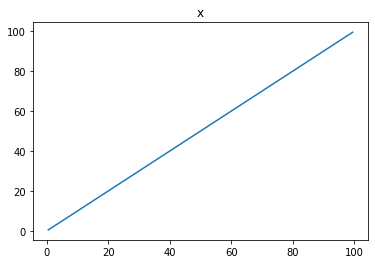

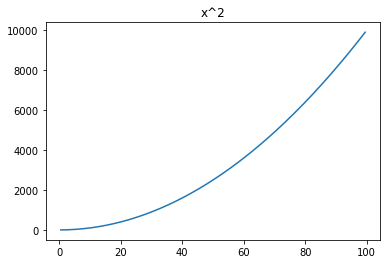

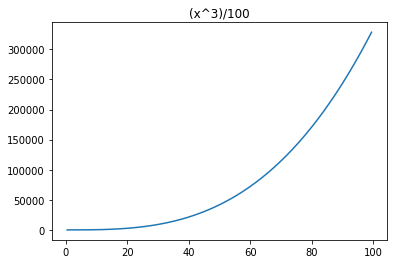

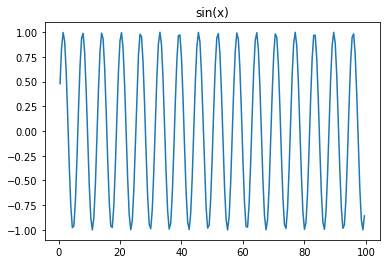

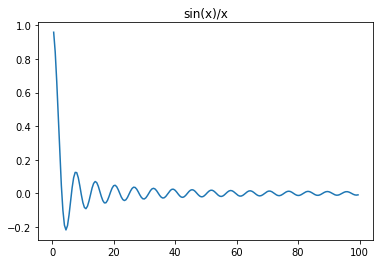

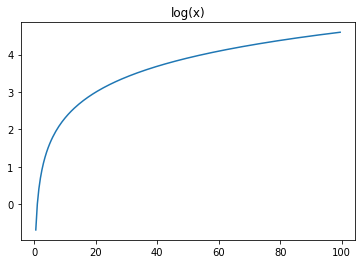

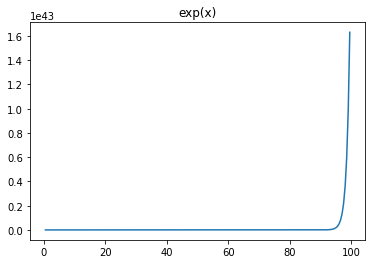

In [41]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.0, 0.5)

y1 = x
y2 = x*x
y3 = (x**3)/3
y4 = np.sin(x)
y5 = np.sin(x)/x
y6 = np.log(x)
y7 = np.exp(x)

plt.title('x')
plt.plot(x, y1)
plt.show()

plt.title('x^2')
plt.plot(x, y2)
plt.show()

plt.title('(x^3)/100')
plt.plot(x, y3)
plt.show()

plt.title('sin(x)')
plt.plot(x, y4)
plt.show()

plt.title('sin(x)/x')
plt.plot(x, y5)
plt.show()

plt.title('log(x)')
plt.plot(x, y6)
plt.show()

plt.title('exp(x)')
plt.plot(x, y7)
plt.show()

#Problem 10&11

In [42]:
import numpy as np
import pandas as pd

A = np.random.uniform(1, 2, size=(20, 5))
print("Matrix")
print(A)
print()

df = pd.DataFrame(A, columns=["a", "b", "c", "d", "e"])

stdev_Col = df.std().idxmax()
mean_Row = df.mean(axis=1).idxmin()

print("Column with highest standard deviation:", stdev_Col)
print("Row with lowest mean:", mean_Row)

Matrix
[[1.69789239 1.77735462 1.40903096 1.82731536 1.3714919 ]
 [1.68961997 1.10273722 1.58619828 1.32186983 1.20391414]
 [1.39421282 1.52509154 1.70197909 1.12048752 1.30387728]
 [1.26488162 1.24213469 1.3676338  1.92509509 1.60636454]
 [1.1053798  1.49985995 1.1061569  1.53841227 1.31793638]
 [1.60431601 1.26192219 1.64099416 1.49896019 1.65590916]
 [1.44440737 1.14107856 1.9975125  1.34822998 1.93815467]
 [1.65880473 1.04753513 1.16212979 1.83342522 1.60801209]
 [1.4399293  1.17657506 1.6638005  1.85713978 1.0382515 ]
 [1.94306106 1.5865079  1.03196433 1.94627585 1.83743349]
 [1.26392456 1.82248028 1.88999784 1.24436298 1.33038603]
 [1.87284865 1.20517562 1.55766819 1.2298902  1.64062241]
 [1.85263415 1.20494604 1.61389779 1.25717563 1.90113122]
 [1.59951767 1.06468984 1.1748553  1.74895409 1.00583006]
 [1.44944582 1.14498129 1.26666059 1.89828917 1.89290001]
 [1.9467631  1.85936168 1.89004236 1.07584337 1.12414335]
 [1.4396844  1.32391063 1.31267662 1.6336925  1.48627393]
 [1.003

In [43]:
df["f"] = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]
df = df.assign(g=np.where(df["f"] < 8, "LT8", "GT8"))

print("Count of LT8 in column g:", df.loc[df["g"] == "LT8", "g"].count())

print("Standard deviation of the column f where column g cell holds LT8:",  df.loc[df["g"] == "LT8", "f"].std())

print("Standard deviation of the column f where column g cell holds GT8:", df.loc[df["g"] == "GT8", "f"].std())

Count of LT8 in column g: 16
Standard deviation of the column f where column g cell holds LT8: 0.44162559005978724
Standard deviation of the column f where column g cell holds GT8: 0.17904633635031494


#Problem 12

Broadcasting is a process used by numpy to allow operations to be performed on arrays of various shapes as long as they are compatible i.e.

Either have

*   Two dimensions to be equal
*   or, one of the dimension should be 1

For e.g.



In [44]:
A = np.array([[51, 32, 53, 4], [31, 65, 7, 88], [19, 10, 16, 12]])
B = np.array([10, 20, 30, 40])

C = A * B

print(C)

[[ 510  640 1590  160]
 [ 310 1300  210 3520]
 [ 190  200  480  480]]


#Problem 13

In [45]:
ArrayRangemin = 0
ArrayRangemax = 20
A = np.random.randint(ArrayRangemin, ArrayRangemax, size = 9)

def lowest_elem(A):
  lowest = 0

  for j in range(len(A)):
    if A[j] < A[lowest]:
        lowest = j

  return lowest

print(A)
lowest = lowest_elem(A)
print(f"The lowest element is {A[lowest]} and its index is {lowest}")

[19 18 19 11 17  0 17  8  7]
The lowest element is 0 and its index is 5


In [46]:
print(np.argmin(A))

5
